# SMS Spam Detection
    
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

    Acknowledgements

    The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.


### 1. Import Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Dataset Loading and Data Preprocessing
#### 2.1. Read dataset using pandas

In [3]:
# enter here
import io
sms = pd.read_csv('sms_spam.csv', encoding = "ISO-8859-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2. Remove redundant attributes

In [4]:
# enter here
sms = sms.dropna(axis='columns')
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.3. Rename columns
Requires: v1 -> label, v2 -> message

In [5]:
# enter here
sms.columns = ['label', 'message']

sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.4. Modify columns
Requires: change ham to 0, and spam to 1 in Label Attribute.

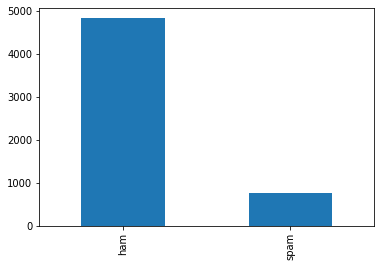

In [6]:
# enter here
sms['label'].value_counts().plot(kind='bar')
# sms['label']
# sms.head()

In [7]:
sms = sms.replace(['ham', 'spam'], [0,1])
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 2.5. Add new column
Requires: Add message_len Attribute that is the length of the message.

In [8]:
# enter here
print("Count message num: ")
sms['message'].isnull().sum()
# sms.head()

Count message num: 


0

In [9]:
length=[]
for row in sms['message']:
  length.append(len(row))
sms['length']=length
sms1=sms
sms.head()

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### 2.6. Histogram graph

Text(0, 0.5, 'Frequency')

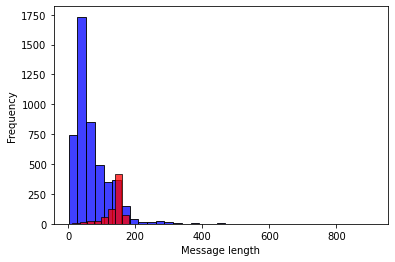

In [10]:
# enter here


sns.histplot(data=sms[sms['label']==0].length, kde=False, label='Ham messages',color='blue', bins=35)
sns.histplot(data=sms[sms['label']==1].length, kde=False, label='Spam messages', color='red', bins=10 )

plt.xlabel('Message length')
plt.ylabel('Frequency')




#### 2.7. Preprocessing text 
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [11]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Apply the above function to preprocess the text.
for row in sms['message']:
  temp = text_process(row)
  sms = sms.replace(row, temp)
sms.head()
# enter here

,label,message,length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif oni,29
2,1,Free entry wkly comp win FA Cup final tkts 21s...,155
3,0,dun say early hor c already say,49
4,0,Nah think goes usf lives around though,61


In [13]:
length=[]
for row in sms['message']:
  length.append(len(row))
sms['length']=length
sms.head()

,label,message,length
0,0,Go jurong point crazy Available bugis n great ...,82
1,0,Ok lar Joking wif oni,21
2,1,Free entry wkly comp win FA Cup final tkts 21s...,133
3,0,dun say early hor c already say,31
4,0,Nah think goes usf lives around though,38


Text(0, 0.5, 'Frequency')

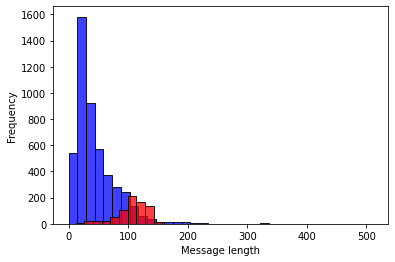

In [14]:
# Draw Histogram graph again with clean messages.

sns.histplot(data=sms[sms['label']==0].length, kde=False, label='Ham messages',color='blue', bins=35)
sns.histplot(data=sms[sms['label']==1].length, kde=False, label='Spam messages', color='red', bins=10 )

plt.xlabel('Message length')
plt.ylabel('Frequency')

# enter here

#### 2.8. Feature extraction using TfidfVectorizer

In [15]:
# enter here
from sklearn.feature_extraction.text import TfidfVectorizer

temp=[]
for row in sms['message']:
  temp.append(row)

vectorizer_tfi = TfidfVectorizer()
X_tfi = vectorizer_tfi.fit_transform(temp)
print(vectorizer_tfi.get_feature_names())
print(X_tfi.shape)

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '087

#### 2.9. Feature extraction using HashingVectorizer

In [16]:
# enter here
from sklearn.feature_extraction.text import HashingVectorizer
temp=[]
for row in sms['message']:
  temp.append(row)
vectorizer_hash = HashingVectorizer(n_features=3**4)
X_hash = vectorizer_hash.fit_transform(temp)
print(X_hash.shape)

(5572, 81)


#### 2.10. Feature extraction using CountVectorizer

In [17]:
# enter here
from sklearn.feature_extraction.text import CountVectorizer
temp=[]
for row in sms['message']:
  temp.append(row)
vectorizer_count = CountVectorizer()
X_count = vectorizer_count.fit_transform(temp)
print(vectorizer_count.get_feature_names())
print(X_count.shape)

['008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '08701213186', '087

#### 2.11. Your contributions

    Create clean_msg_2 with your text_process function. 
    Then, apply feature extraction using TfidfVectorizer, HashingVectorizer and CountVectorizer
    Compare the result with the default text_process function. 

In [18]:
def clean_msg_2(message):
  temp=''
  STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
  word_list = message.split()
  for word in word_list:
    if word.lower() not in STOPWORDS:
      temp += ' '+ word
  return temp[1:]


In [19]:
for row in sms1['message']:
  temp = clean_msg_2(row)
  sms1 = sms1.replace(row, temp)
sms1.head()

,label,message,length
0,0,"Go jurong point, crazy.. Available bugis n gre...",111
1,0,Ok lar... Joking wif oni...,29
2,1,Free entry wkly comp win FA Cup final tkts 21s...,155
3,0,dun say early hor... c already say...,49
4,0,"Nah think goes usf, lives around though",61


In [20]:
length=[]
for row in sms1['message']:
  length.append(len(row))
sms1['length']=length
sms1.head()

,label,message,length
0,0,"Go jurong point, crazy.. Available bugis n gre...",91
1,0,Ok lar... Joking wif oni...,27
2,1,Free entry wkly comp win FA Cup final tkts 21s...,139
3,0,dun say early hor... c already say...,37
4,0,"Nah think goes usf, lives around though",39


In [21]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

X1 = sms1['message']
y1 = sms1['label']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 50)

X = sms['message']
y = sms['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [22]:
#HashingVectorizer
vectorizer_hash = HashingVectorizer()
X1_train_hash = vectorizer_hash.fit_transform(X1_train)

In [23]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('hashing', HashingVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('hashing',
                 HashingVectorizer(alternate_sign=True, analyzer='word',
                                   binary=False, decode_error='strict',
                                   dtype=<class 'numpy.float64'>,
                                   encoding='utf-8', input='content',
                                   lowercase=True, n_features=1048576,
                                   ngram_range=(1, 1), norm='l2',
                                   preprocessor=None, stop_words=None,
                                   strip_accents=None,
                                   token_pattern='(?u)\\b\\w\\w+\\b',
                                   tokenizer=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                               

In [24]:
predictions = pipeline.predict(X1_test)

In [25]:
#Sms1
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms1: ")
print(accuracy_score(y1_test, predictions))
print(confusion_matrix(y1_test, predictions))
print(classification_report(y1_test, predictions))

Sms1: 
0.9665071770334929
[[1407   19]
 [  37  209]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1426
           1       0.92      0.85      0.88       246

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [26]:
vectorizer_hash = HashingVectorizer()
X_train_hash = vectorizer_hash.fit_transform(X_train)

In [27]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('hashing', HashingVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('hashing',
                 HashingVectorizer(alternate_sign=True, analyzer='word',
                                   binary=False, decode_error='strict',
                                   dtype=<class 'numpy.float64'>,
                                   encoding='utf-8', input='content',
                                   lowercase=True, n_features=1048576,
                                   ngram_range=(1, 1), norm='l2',
                                   preprocessor=None, stop_words=None,
                                   strip_accents=None,
                                   token_pattern='(?u)\\b\\w\\w+\\b',
                                   tokenizer=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                               

In [28]:
predictions = pipeline.predict(X_test)

In [29]:
#Sms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms: ")
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Sms: 
0.9581339712918661
[[1406   20]
 [  50  196]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1426
           1       0.91      0.80      0.85       246

    accuracy                           0.96      1672
   macro avg       0.94      0.89      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [30]:
# TfidfVectorizer
vectorizer_tfi = TfidfVectorizer()
X1_train_tfi = vectorizer_tfi.fit_transform(X1_train)

In [31]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

In [32]:
predictions = pipeline.predict(X1_test)

In [33]:
#Sms1
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms1")
print(accuracy_score(y1_test, predictions))
print(confusion_matrix(y1_test, predictions))
print(classification_report(y1_test, predictions))

Sms1
0.9527511961722488
[[1406   20]
 [  59  187]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1426
           1       0.90      0.76      0.83       246

    accuracy                           0.95      1672
   macro avg       0.93      0.87      0.90      1672
weighted avg       0.95      0.95      0.95      1672



In [34]:
vectorizer_tfi = TfidfVectorizer()
X_train_tfi = vectorizer_tfi.fit_transform(X_train)

In [35]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

In [36]:
predictions = pipeline.predict(X_test)

In [37]:
#Sms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms")
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Sms
0.9521531100478469
[[1408   18]
 [  62  184]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1426
           1       0.91      0.75      0.82       246

    accuracy                           0.95      1672
   macro avg       0.93      0.87      0.90      1672
weighted avg       0.95      0.95      0.95      1672



In [38]:
# CountVectorizer
vectorizer_tfi = CountVectorizer()
X1_train_count = vectorizer_count.fit_transform(X1_train)

In [39]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('count', CountVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
               

In [40]:
predictions = pipeline.predict(X1_test)

In [41]:
#Sms1
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms1")
print(accuracy_score(y1_test, predictions))
print(confusion_matrix(y1_test, predictions))
print(classification_report(y1_test, predictions))

Sms1
0.9665071770334929
[[1411   15]
 [  41  205]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1426
           1       0.93      0.83      0.88       246

    accuracy                           0.97      1672
   macro avg       0.95      0.91      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [42]:
vectorizer_count = CountVectorizer()
X_train_count = vectorizer_count.fit_transform(X_train)

In [43]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('count', CountVectorizer()),
                      ('clf', DecisionTreeClassifier()),
                    ])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('count',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
               

In [44]:
predictions = pipeline.predict(X_test)

In [45]:
#Sms
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Sms")
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Sms
0.9641148325358851
[[1415   11]
 [  49  197]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1426
           1       0.95      0.80      0.87       246

    accuracy                           0.96      1672
   macro avg       0.96      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



### 3. Spam detection

In [46]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import metrics
import time

y = sms.label

# only using the decision tree classifier with default setting for training and predicting. 
# In other words, make no changes to this section.

model = tree.DecisionTreeClassifier()

#### 3.1. Using TF-IDF Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_tv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [53]:
acc_tv = []
# enter here
from sklearn.model_selection import cross_val_score, KFold
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
import time

folds = range(2,6)
for i in folds:
  start = time.time()
  acc_tv=cross_val_score(model, X_train_tfi, y_train, scoring="accuracy", cv=KFold(n_splits=i))
  end=time.time()
  print("- folds=%d, accuracy= %f, time= %f" %(i, mean(acc_tv), (end-start)))




- folds=2, accuracy= 0.946154, time= 0.153567
- folds=3, accuracy= 0.952821, time= 0.339383
- folds=4, accuracy= 0.954359, time= 0.545237
- folds=5, accuracy= 0.955128, time= 0.720568


#### 3.2. Using Hashing Vectorizer
    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_hv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [54]:
acc_hv = []
# enter here
folds = range(2,6)
for i in folds:
  start = time.time()
  acc_hv=cross_val_score(model, X_train_hash, y_train, scoring="accuracy", cv=KFold(n_splits=i))
  end=time.time()
  print("- folds=%d, accuracy= %f, time= %f" %(i, mean(acc_hv), (end-start)))

- folds=2, accuracy= 0.945641, time= 7.832203
- folds=3, accuracy= 0.949231, time= 15.279437
- folds=4, accuracy= 0.951026, time= 21.861047
- folds=5, accuracy= 0.957179, time= 28.553749


#### 3.3. Using Count Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_cv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [56]:
acc_cv = []
# enter here
folds = range(2,6)
for i in folds:
  start = time.time()
  acc_cv=cross_val_score(model, X_train_count, y_train, scoring="accuracy", cv=KFold(n_splits=i))
  end=time.time()
  print("- folds=%d, accuracy= %f, time= %f" %(i, mean(acc_cv), (end-start)))

- folds=2, accuracy= 0.950256, time= 0.125520
- folds=3, accuracy= 0.957949, time= 0.256538
- folds=4, accuracy= 0.959487, time= 0.375271
- folds=5, accuracy= 0.958974, time= 0.529286


#### 3.4. Ploting Accuracies in 5-Folds

[0.96794872 0.96153846 0.96538462 0.95512821 0.95512821]
[0.96538462 0.95128205 0.96153846 0.9525641  0.95512821]
[0.96410256 0.96025641 0.95512821 0.95897436 0.95641026]


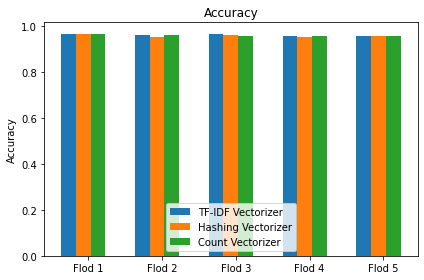

In [101]:
# enter here
import matplotlib.pyplot as plt
import numpy

print(acc_tv)
print(acc_hv)
print(acc_cv)

labels = ['Flod 1', 'Flod 2', 'Flod 3', 'Flod 4', 'Flod 5']

x=numpy.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/3-width/3-width/3-width/3, acc_tv, width, label='TF-IDF Vectorizer')
rects2 = ax.bar(x-width/3, acc_hv, width, label='Hashing Vectorizer')
rects3 = ax.bar(x+width/3+width/3, acc_cv, width, label='Count Vectorizer')


ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.set_label(rects1)
ax.set_label(rects2)
ax.set_label(rects3)

fig.tight_layout()

plt.show()

